In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt

In [28]:
pima_df=pd.read_csv("Pima Indians Diabetes Dataset - diabetes.csv")
pima_df.head().transpose()

,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,0.000,23.000,35.000
Insulin,0.000,0.000,0.000,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


In [ ]:
#To check sorts of data in the datasets
pima_df.dtypes

In [ ]:
#to check null values 
pima_df.isnull().sum()

Number of non diabetic patients : 500
Number of diabetic patients : 268


Text(0.5, 1.0, 'non diabetic patients:500 and diabetic patients:268')

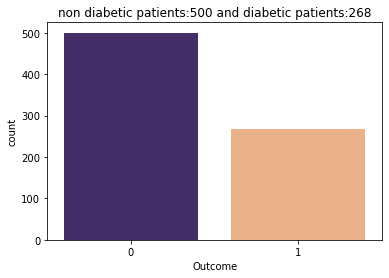

In [23]:
y = pima_df.Outcome
ND,D = y.value_counts()
print('Number of non diabetic patients :', ND)
print('Number of diabetic patients :' , D)
ax=sns.countplot(x='Outcome',data = pima_df , palette=['#432371',"#FAAE7B"])
plt.title('non diabetic patients:500 and diabetic patients:268')
# ax[0].set_color('r')

In [5]:
# function to analyse the distribution of the features
pima_df.describe().transpose()


NameError: name 'pima' is not defined

Mean:  3.8450520833333335  std is:  3.3695780626988623


Text(0.5, 1.0, 'Density Plot for Pregancies')

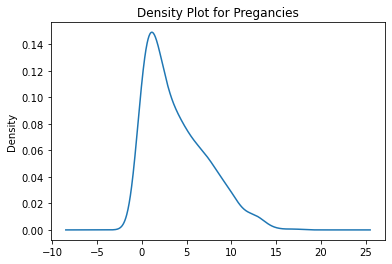

In [6]:
x=pima_df['Pregnancies']
x.plot.density()
print("Mean: ",x.mean()," std is: ",x.std())
plt.title('Density Plot for Pregancies')

Mean:  120.89453125  std is:  31.97261819513622


Text(0.5, 1.0, 'Density Plot for Glucose')

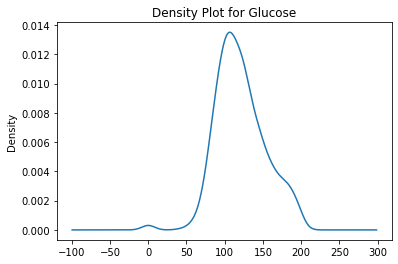

In [7]:
x=pima_df['Glucose']
x.plot.density()
print("Mean: ",x.mean()," std is: ",x.std())
plt.title('Density Plot for Glucose')

Mean:  69.10546875  std is:  19.355807170644777


Text(0.5, 1.0, 'Density Plot for BloodPressure')

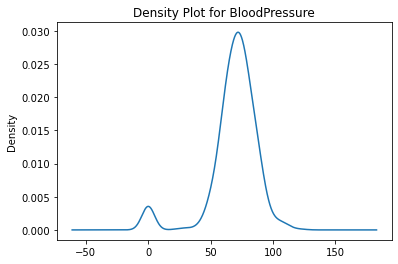

In [8]:
x=pima_df['BloodPressure']
x.plot.density()
print("Mean: ",x.mean()," std is: ",x.std())
plt.title('Density Plot for BloodPressure')

Mean:  20.536458333333332  std is:  15.952217567727677


Text(0.5, 1.0, 'Density Plot for SkinThickness')

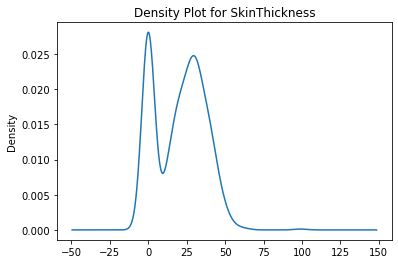

In [9]:
x=pima_df['SkinThickness']
x.plot.density()
print("Mean: ",x.mean()," std is: ",x.std())
plt.title('Density Plot for SkinThickness')

Mean:  79.79947916666667  std is:  115.24400235133837


Text(0.5, 1.0, 'Density Plot for Insulin')

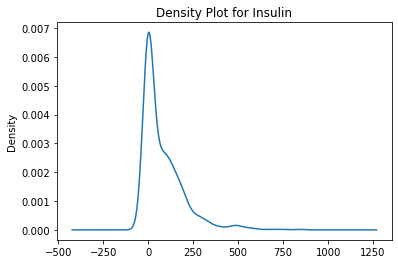

In [10]:
x=pima_df['Insulin']
x.plot.density()
print("Mean: ",x.mean()," std is: ",x.std())
plt.title('Density Plot for Insulin')

Mean:  31.992578124999977  std is:  7.8841603203754405


Text(0.5, 1.0, 'Density Plot for BMI')

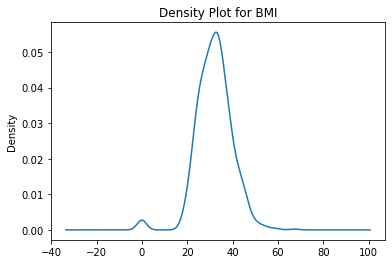

In [11]:
x=pima_df['BMI']
x.plot.density()
print("Mean: ",x.mean()," std is: ",x.std())
plt.title('Density Plot for BMI')

Mean:  0.4718763020833327  std is:  0.33132859501277484


Text(0.5, 1.0, 'Density Plot for DiabetesPedigreeFunction')

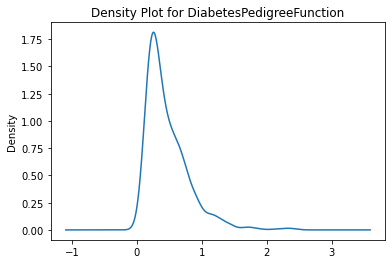

In [12]:
x=pima_df['DiabetesPedigreeFunction']
x.plot.density()
print("Mean: ",x.mean()," std is: ",x.std())
plt.title('Density Plot for DiabetesPedigreeFunction')

Mean:  33.240885416666664  std is:  11.76023154067868


Text(0.5, 1.0, 'Density Plot for Age')

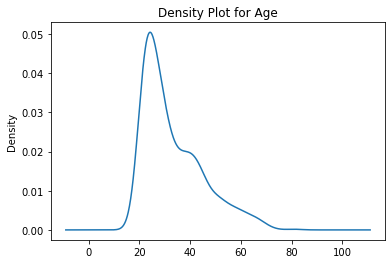

In [13]:
x=pima_df['Age']
x.plot.density()
print("Mean: ",x.mean()," std is: ",x.std())
plt.title('Density Plot for Age')

In [14]:
sum((pima_df['Insulin']==0))

374

<AxesSubplot:>

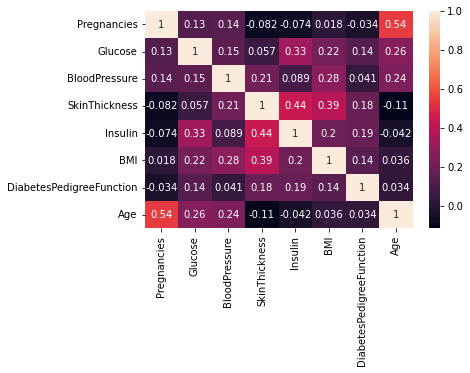

In [29]:
import seaborn as sn
pima_df=pd.read_csv("Pima Indians Diabetes Dataset - diabetes.csv")
pima=pima_df.drop(['Outcome'],axis=1);
sn.heatmap(pima.corr(),annot=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age')])

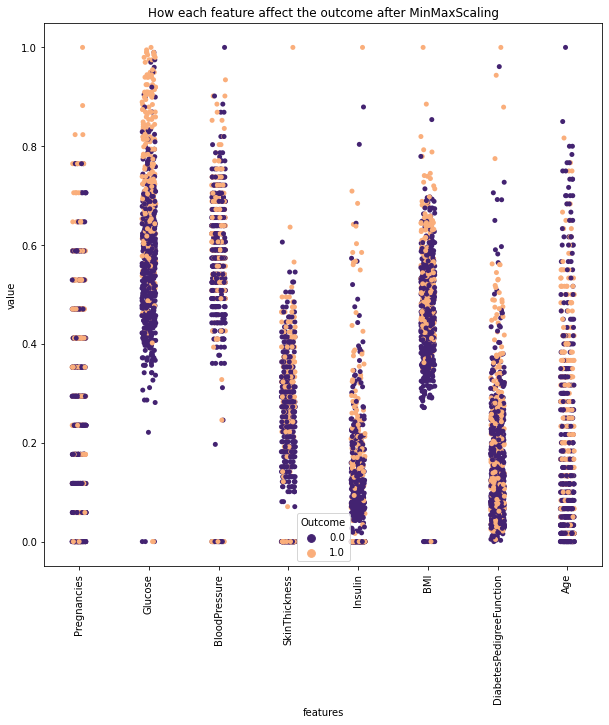

In [26]:
import sklearn as sk 
scaler = sk.preprocessing.MinMaxScaler()

pima_df=pd.DataFrame(scaler.fit_transform(pima_df),columns=pima_df.keys())
dataover = pd.melt(pima_df,id_vars="Outcome",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.stripplot(x="features", y="value", hue="Outcome", data=dataover , palette=['#432371',"#FAAE7B"])
plt.title('How each feature affect the outcome after MinMaxScaling')


plt.xticks(rotation=90)

In [18]:
(pima_df.drop(['Outcome'],axis=1))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47
